 Lambda School Data Science, Unit 2: Predictive Modeling

 # Regression & Classification, Module 1

 ## Assignment

 You'll use another **New York City** real estate dataset.

 But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

 The data comes from renthop.com, an apartment listing website.

 - [ ] Look at the data. Choose a feature, and plot its relationship with the target.
 - [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
 - [ ] Define a function to make new predictions and explain the model coefficient.
 - [ ] Organize and comment your code.

 > [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

 ## Stretch Goals
 - [ ] Do linear regression with two or more features.
 - [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
 - [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [1]:
import os, sys

get_ipython().system('ls')


data  LICENSE  module1	module2  module3  module4  README.md  requirements.txt


In [2]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
# import warnings
# warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')



In [3]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('./data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)



In [4]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]





In [5]:
df.describe()




,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,...,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,...,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,...,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df.isna().sum()
df['interest_numeric'] = df['interest_level'].replace({'low':1,'medium':2,'high':3})


In [7]:
target = 'price'
features = df.columns[df.dtypes!='object']
features = features.drop(target)
df[features].isna().sum()


bathrooms               0
bedrooms                0
latitude                0
longitude               0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
interest_numeric        0
dtype: int64

In [8]:
from sklearn.linear_model import LinearRegression
import numpy

lr_model = LinearRegression()

lr_model.fit(df[features],df[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
import sklearn.metrics as metrics

y_pred = lr_model.predict(df[features])

mse = metrics.mean_squared_error(df[target], y_pred)
r2 = metrics.r2_score(df[target], y_pred)

mean = numpy.mean(df[target])
baseline = metrics.mean_squared_error(df[target],numpy.linspace(mean, mean, len(df[target])))

print(f'Baseline Mean Squared Error: {baseline}')

print(f'All numerics Mean Squared Error: {mse}')
print(f'All numerics R^2 score: {r2}')

# lr_model.coef_

# df.iloc[target]


Baseline Mean Squared Error: 3106063.7154934197
All numerics Mean Squared Error: 1116244.1733965015
All numerics R^2 score: 0.6406241868675967


In [10]:

def do_regression(df, features, target):
	lr_model = LinearRegression()
	lr_model.fit(df[features],df[target])
	y_pred = lr_model.predict(df[features])
	mse = metrics.mean_squared_error(df[target], y_pred)
	r2 = metrics.r2_score(df[target], y_pred)
	return(lr_model, mse, r2)

for feature in features:
	model, mse, r2 = do_regression(df, [feature], target)
	print(f'{target} changes by {model.coef_} as {feature} increases.')
	print(f'Mean Squared Error for this relationship: {mse}')
	print(f'R^2 score for this relationship: {r2}')



price changes by [2573.37439508] as bathrooms increases.
Mean Squared Error for this relationship: 1638830.2893728837
R^2 score for this relationship: 0.4723771179585915
price changes by [853.25416753] as bedrooms increases.
Mean Squared Error for this relationship: 2215388.9330691006
R^2 score for this relationship: 0.2867535453253989
price changes by [-1638.14190247] as latitude increases.
Mean Squared Error for this relationship: 3101990.203949415
R^2 score for this relationship: 0.001311470696394701
price changes by [-15315.11586964] as longitude increases.
Mean Squared Error for this relationship: 2910349.8619508506
R^2 score for this relationship: 0.06301025074480127
price changes by [731.17270124] as elevator increases.
Mean Squared Error for this relationship: 2972739.8583355993
R^2 score for this relationship: 0.04292373543169281
price changes by [181.57690054] as cats_allowed increases.
Mean Squared Error for this relationship: 3097836.746497636
R^2 score for this relationshi

In [11]:
df.head()


,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,interest_numeric
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,2
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,...,0,0,0,0,0,0,0,0,0,3
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,...,0,0,0,0,0,0,0,0,0,1
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,...,0,0,0,0,0,0,0,0,0,1


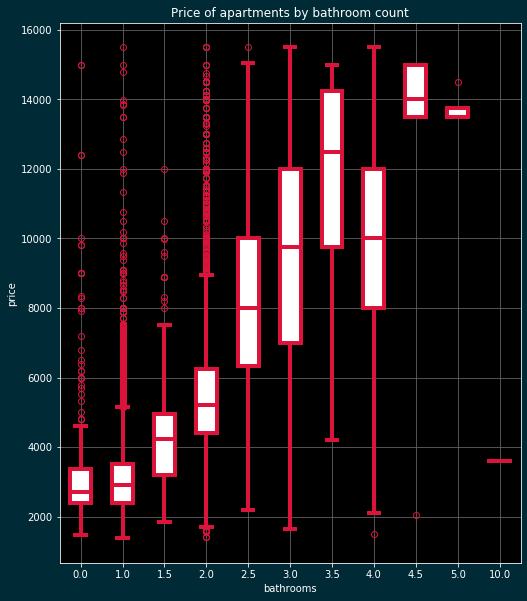

In [12]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'


boxen = df.boxplot(	target, 
					by='bathrooms', 
					patch_artist=True,
					return_type='dict',
					figsize=(8,10))['price']

for linetype in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
	pyplot.setp(boxen[linetype], color='crimson', linewidth=4)

pyplot.setp(boxen['boxes'], facecolor='white')
pyplot.setp(boxen['fliers'], markeredgecolor='crimson')
pyplot.grid(color='#666666')
pyplot.ylabel('price')
pyplot.title('Price of apartments by bathroom count')
pyplot.suptitle(None)

pyplot.show()


In [13]:
# df.corr()
